In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
Missing values in each column:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


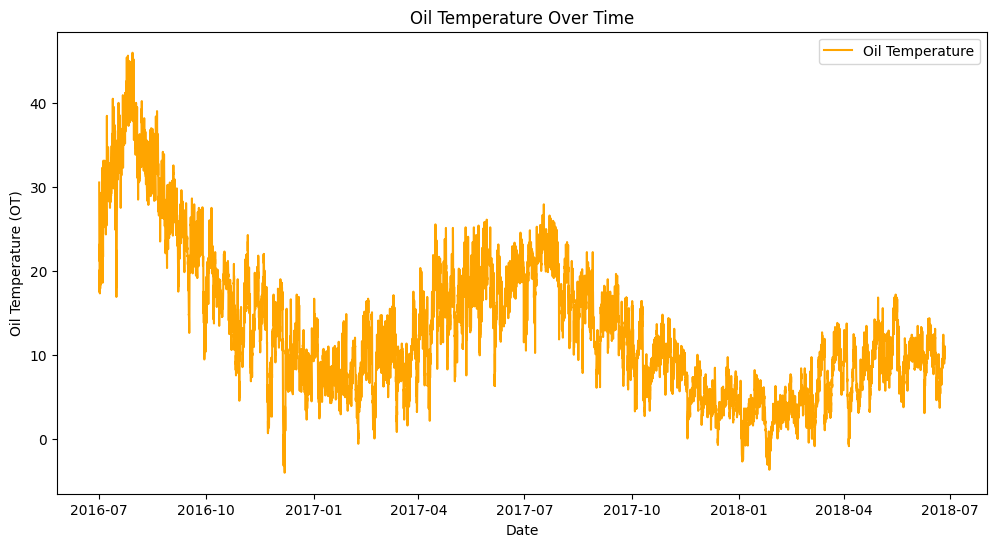

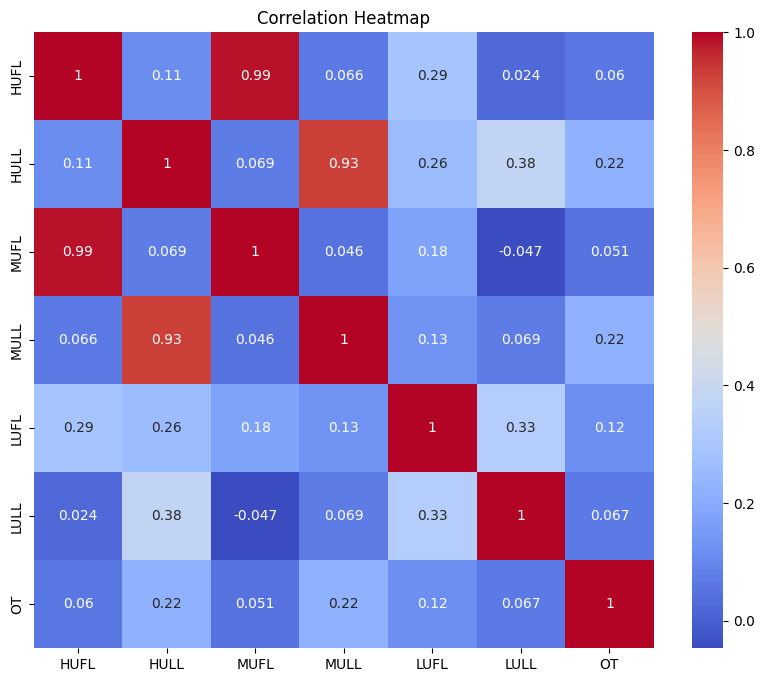

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/temperature/ett.csv')

# Convert 'date' to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date as the index
data.set_index('date', inplace=True)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Plotting oil temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data['OT'], label='Oil Temperature', color='orange')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.show()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)

# Feature Engineering: Adding time-based features
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour

# Features and target variable
X = data.drop(columns=['OT'])
y = data['OT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/tmp/ipykernel_30/2440670183.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 2.0220562992449027
R² Score: 0.9722888195545751


                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
Missing values in each column:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


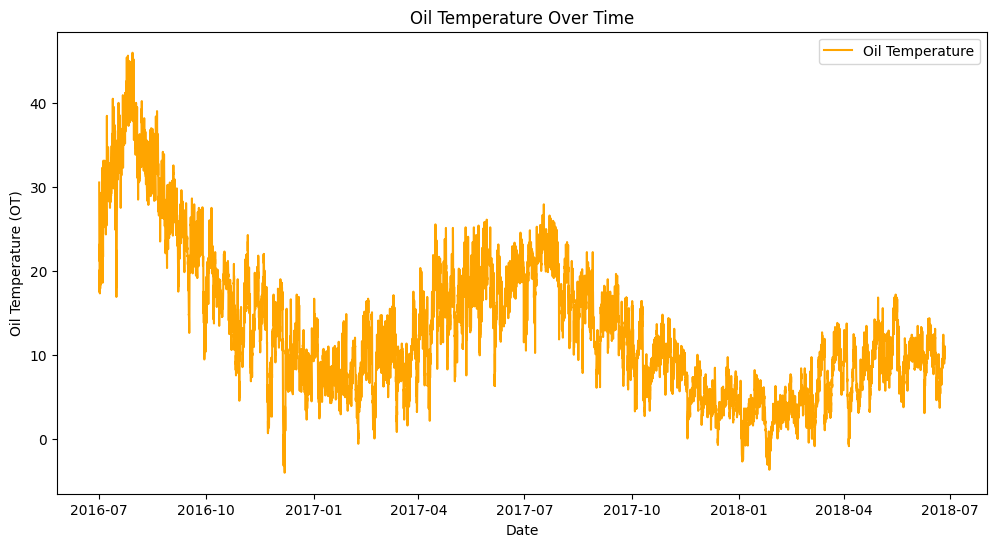

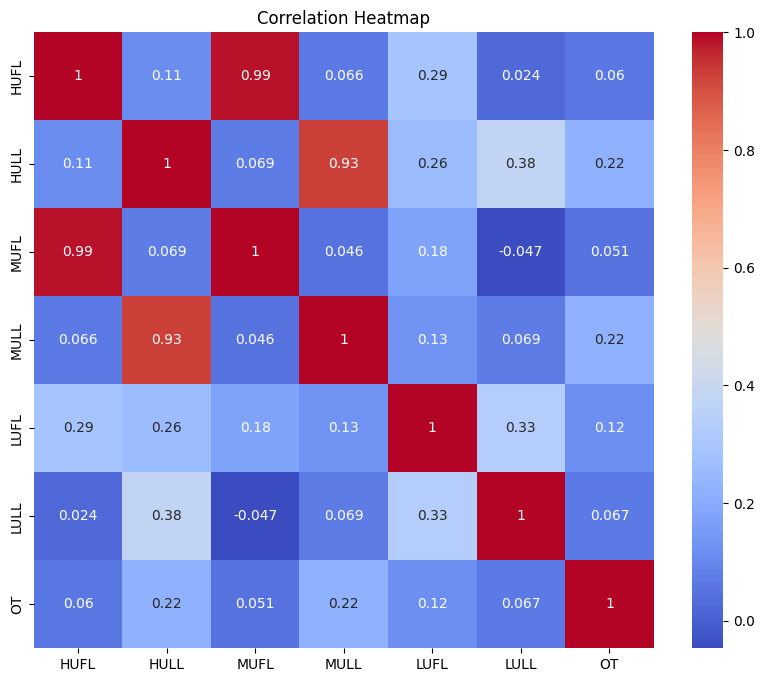

/tmp/ipykernel_30/4032993141.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Mean Squared Error: 2.0220562992449027
R² Score: 0.9722888195545751


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/kaggle/input/temperature/ett.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# EDA
print(data.head())
print("Missing values in each column:\n", data.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(data['OT'], label='Oil Temperature', color='orange')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing
data.fillna(method='ffill', inplace=True)
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour

X = data.drop(columns=['OT'])
y = data['OT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


                      HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
date                                                                    
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000
Missing values in each column:
 HUFL    0
HULL    0
MUFL    0
MULL    0
LUFL    0
LULL    0
OT      0
dtype: int64


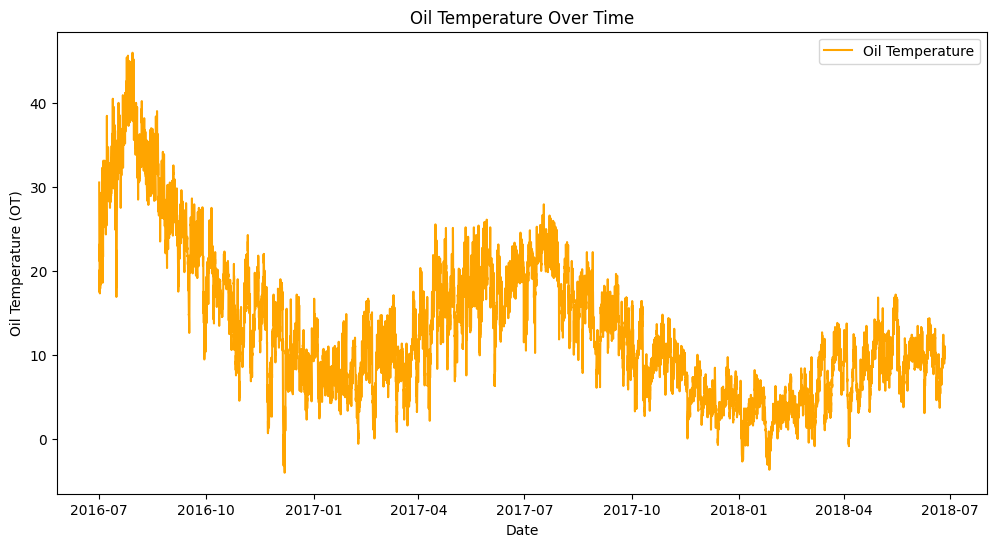

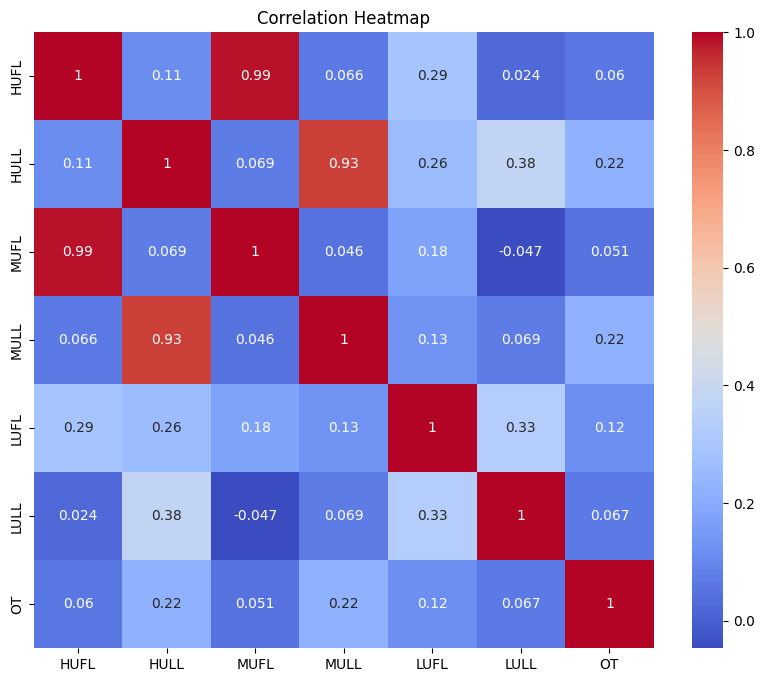

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/tmp/ipykernel_30/394927606.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Cross-Validation Scores: [0.95078769 0.94957119 0.95288035 0.95091211 0.95081454]
Average CV Score: 0.9509931755891108
Mean Squared Error: 3.265934096841791
R² Score: 0.9552421517075241


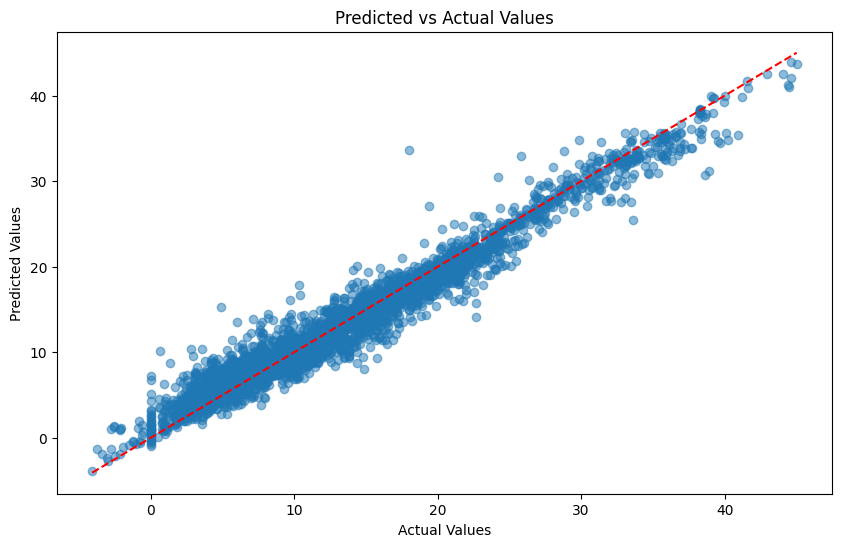

[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.3s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=T

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/kaggle/input/temperature/ett.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# EDA
print(data.head())
print("Missing values in each column:\n", data.isnull().sum())

plt.figure(figsize=(12, 6))
plt.plot(data['OT'], label='Oil Temperature', color='orange')
plt.title('Oil Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Temperature (OT)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocessing
data.fillna(method='ffill', inplace=True)
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour

# Additional Feature Engineering
data['day_of_week'] = data.index.dayofweek
data['is_weekend'] = (data['day_of_week'] >= 5).astype(int)  # 1 if weekend, else 0
data['sin_hour'] = np.sin(2 * np.pi * data['hour'] / 24)  # Cyclical feature
data['cos_hour'] = np.cos(2 * np.pi * data['hour'] / 24)  # Cyclical feature

X = data.drop(columns=['OT'])
y = data['OT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Cross-Validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {cv_scores.mean()}')

# Model Evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Visualizing Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
